In [3]:
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from skimage import feature
from skimage import filters
import numpy as np
import imageio
%matplotlib inline
plt.rcParams.update({'image.interpolation': None})
plt.rcParams.update({'font.size': 15})

## 10-02 Iterative Global Thresholding and Otsu Thresholding

### (a) Original Image and Histogram:

(0.0, 255.0)

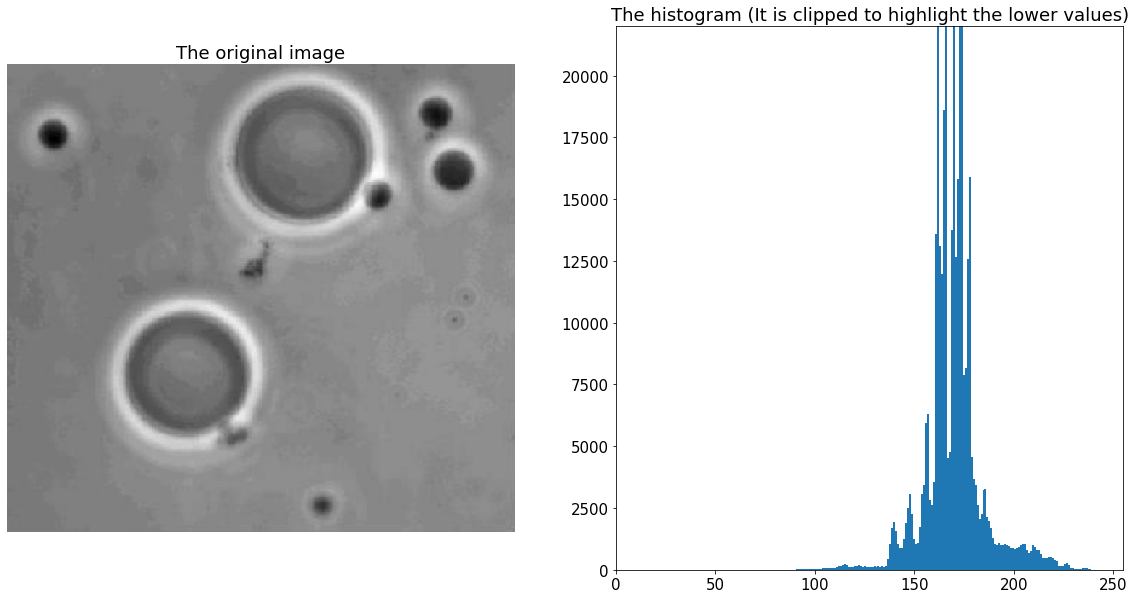

In [4]:
I = np.asarray(imageio.imread('polymercell.tif'))
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(I,cmap='gray')
plt.axis('off')
plt.title('The original image')
plt.subplot(1,2,2)
plt.hist(I.flatten(), bins=256, range=(0,255))
plt.title('The histogram (It is clipped to highlight the lower values)')
plt.ylim(0,22000)
plt.xlim(0,255)

### (b) Iterative Global Threshold:

In [7]:
def iterative_global_threshold(I,delta_T):
    
    T_old = 0
    T_new = np.mean(I)

    while abs(T_new-T_old) >= delta_T:
        
        G1 = np.where(I>T_new, I, 0)
        s1 = np.sum(G1)
        n1 = np.count_nonzero(G1)
        m1 = s1/n1
        
        G2 = np.where(I<=T_new, I, 0)
        s2 = np.sum(G2)
        n2 = np.count_nonzero(G2)
        m2 = s2/n2

        T_old = T_new
        T_new = 0.5*(m1+m2)
        
    T = T_new
    I_thresh = np.where(I>T, 1, 0)
        
    return I_thresh, T

The coveraged threshold value in interative global threshold algorithms is T = 169.39499746303449


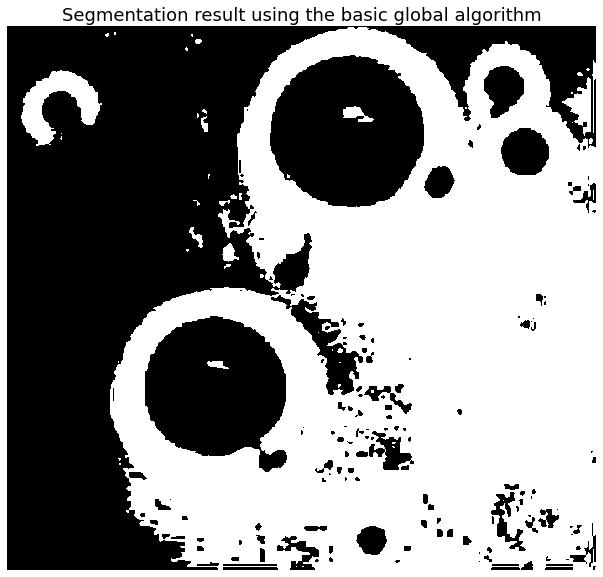

In [8]:
delta_T = 10
I_thresh,T=iterative_global_threshold(I,delta_T)
plt.figure(figsize=(20,10))
plt.imshow(I_thresh,cmap='gray')
plt.axis('off')
plt.title('Segmentation result using the basic global algorithm')
print('The coveraged threshold value in interative global threshold algorithms is T =', T)

For writing the function of iterative global threshold, at first initiate the threshold value. Based on textbook, a good initial choice for T is the average inteninsity of the image. Then, seperating the pixels of image into two groups. G1 consists of pixels with intenisty more than threshold and G2 consists of pixels less than threshold. Next step is computing the mean of intensity values in G1 and G2. For computing the mean in each pixels group, the summation of nonzero intensities values are computed and then divide this summation in the number of the nonzero intensities values. In this step, if np.mean(G1) is used, the value of the mean is not correct because it divides the summation by the whole number of G1 which is the same as the image I. Then, compute a new threshold value midway between these two mean values and repeat this process interatively until the difference between the threshold of two successive iterations become smaller than the delta_T.

The obtained threshold is close to the value of the threshold mentioned in the textbook but not exactly the same. The obtained threshold based on global thresholding algorithm is 169 but from my function, the threshold is about 169.4

### (c) Otsu Threshold:

The threshold value obtained from Ostu threshold algorithms is T = 181


Text(0.5, 1.0, 'Segmentation result using the Ostu algorithm')

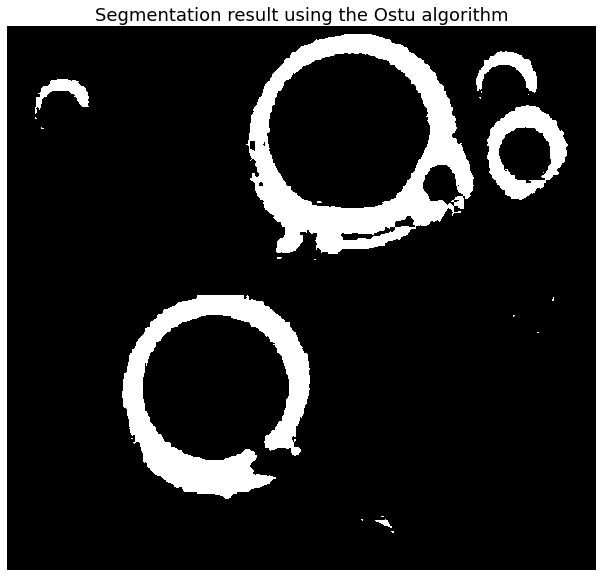

In [5]:
T_otsu=filters.threshold_otsu(I)
print('The threshold value obtained from Ostu threshold algorithms is T =', T_otsu)
plt.figure(figsize=(20,10))
I_otsu = np.where(I>T_otsu, 1, 0)
plt.imshow(I_otsu,cmap='gray')
plt.axis('off')
plt.title('Segmentation result using the Ostu algorithm')

The obtained threshold from the Ostu method is 181 while the threshold that the textbook computed is 182. These values are close to each other but not exactly the same. 

In I_thresh, the threshold value is 169.4, this threshold could not segment the molecules from the background. Because based on the histogram, it is far from the lighter areas in the image defining the cells. While in the image obtained from the Ostu method, the threshold is 181 and it is near the border of light areas and the background. Thus, it is performed better in achieving the desired segmentation.

## 10-07 Using Edge Information to Improve Thresholding

The threshold value is obtained from Ostu method applying on the noisy image:  74.837890625
The threshold value is obtained from Ostu method applying on the smoothed noisy image:  76.03999999999999


Text(0.5, 1.0, 'Using the Ostu algorithm on the smoothed noisy image')

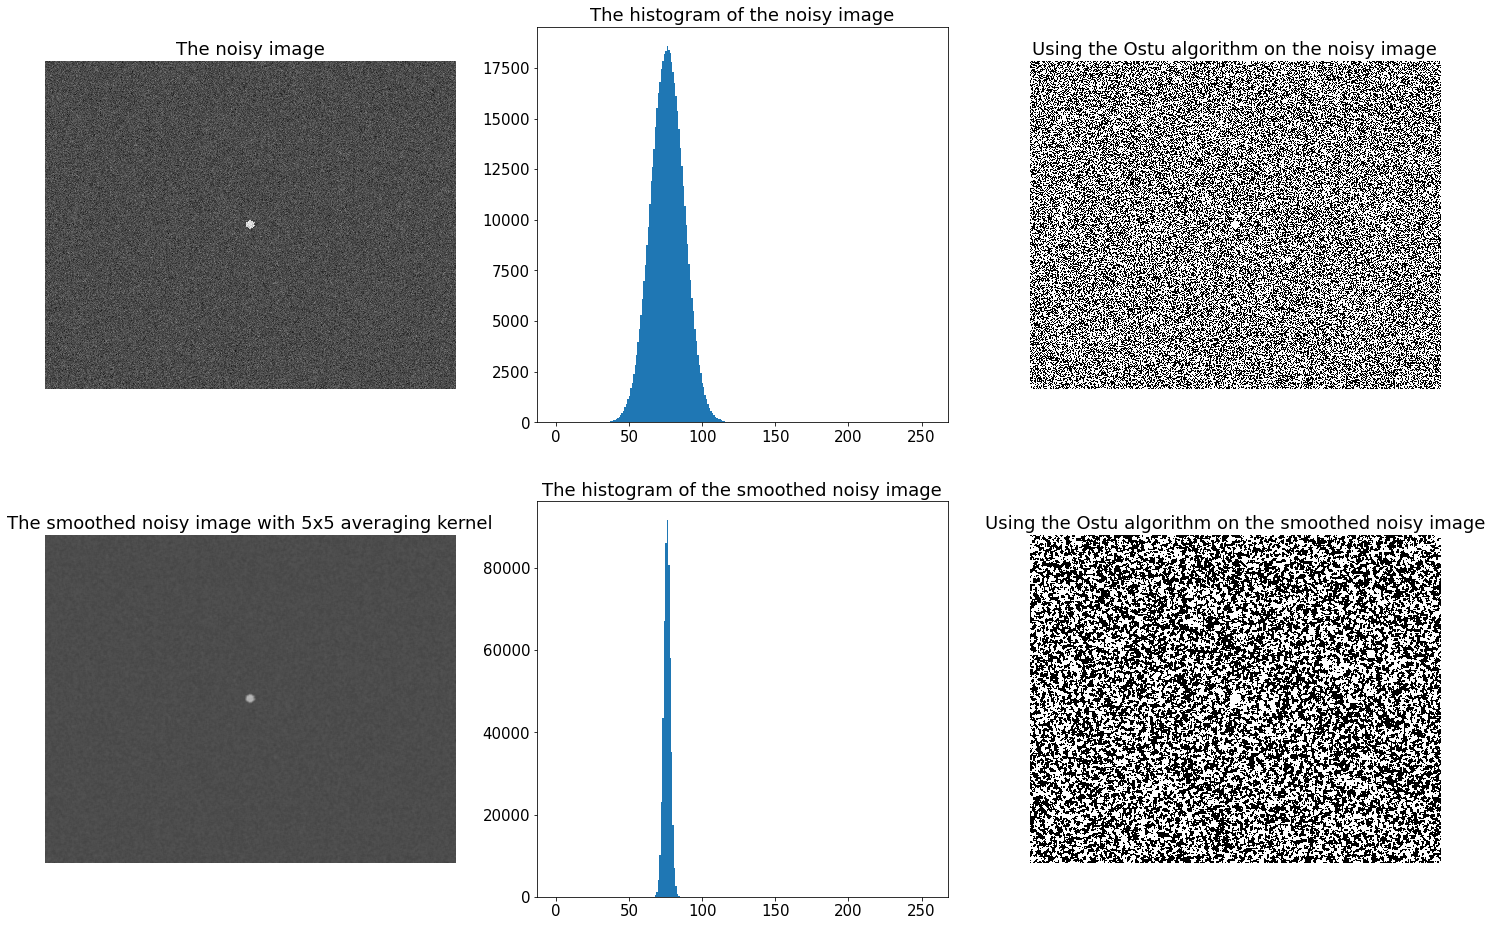

In [6]:
I1 = np.asarray(imageio.imread('septagon-small.tif')).astype(float)

plt.figure(figsize=(25,16))

plt.subplot(2,3,1)
plt.imshow(I1,cmap="gray")
plt.axis('off')
plt.title('The noisy image')

plt.subplot(2,3,2)
plt.hist(I1.flatten(),bins=256,range=[0,255])
plt.title('The histogram of the noisy image')

plt.subplot(2,3,3)
T1_otsu=filters.threshold_otsu(I1)
print("The threshold value is obtained from Ostu method applying on the noisy image: ", T1_otsu)
I1_ostu = np.where(I1>T1_otsu, 1, 0)
plt.imshow(I1_ostu,cmap="gray")
plt.axis('off')
plt.title('Using the Ostu algorithm on the noisy image')

plt.subplot(2,3,4)
average_kernel = np.ones((5,5))/25
I1_smoothed = ndimage.convolve(I1,average_kernel, mode="nearest")
plt.imshow(I1_smoothed,cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('The smoothed noisy image with 5x5 averaging kernel')

plt.subplot(2,3,5)
plt.hist(I1_smoothed.flatten(),bins=256,range=[0,255])
plt.title('The histogram of the smoothed noisy image')

plt.subplot(2,3,6)
T1s_otsu=filters.threshold_otsu(I1_smoothed)
print("The threshold value is obtained from Ostu method applying on the smoothed noisy image: ", T1s_otsu)
I1s_ostu = np.where(I1_smoothed>T1s_otsu, 1, 0)
plt.imshow(I1s_ostu,cmap="gray")
plt.axis('off')
plt.title('Using the Ostu algorithm on the smoothed noisy image')

Firstly, import the image and visualization the image and its histogram with 256 bins and in the range of [0,255]. Then, apply the Ostu method to the noisy image. The obtained threshold is about 74.6. As it is shown, the resulting image from this method has not illustrated any segmentation. This result is predictable based on its histogram. In its histogram, there is any clear valley, thus it expects segmentation to fail. Then, smoothing the noisy image with an averaging 5x5 kernel. The kernel is a matrix with a size of 5x5 and each element is 1/25. Then, convolving this kernel with the image in the mode of nearest. It means the type of padding in this convolution is the nearest. Then, illustrates the result in the range of [0,255] and its histogram. In this method, the Ostu method is applied to the smoothed noisy image. Based on its histogram, as expected, the net effect was to reduce the spread of the histogram, but the distribution still is unimodal. So the segmentation failed again. The reason for this failure is the region that should be segmented is so small that its contribution to the histogram is insignificant compared to the intensity spread caused by noise.

The threshold value is obtained from Ostu method:  120.73046875


Text(0.5, 1.0, 'Using the Ostu method on the product image')

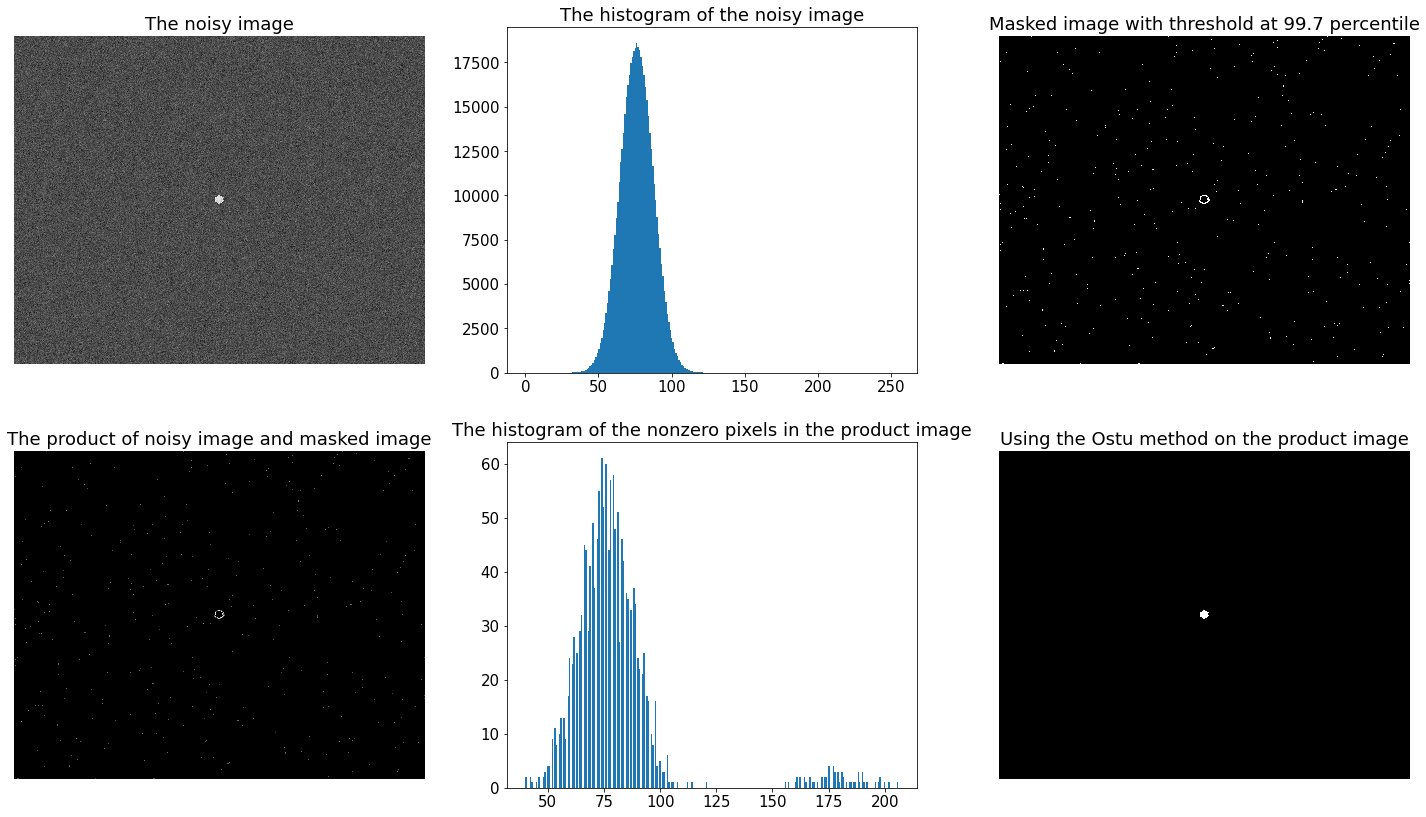

In [7]:
I2 = np.asarray(imageio.imread('septagon-small.tif')).astype(float)

plt.figure(figsize=(25,14))
plt.subplot(2,3,1)
plt.imshow(I2,cmap="gray")
plt.axis('off')
plt.title('The noisy image')

plt.subplot(2,3,2)
plt.hist(I2.flatten(),bins=256,range=[0,255])
plt.title('The histogram of the noisy image')

plt.subplot(2,3,3)
I2=I2/255
sobel_horiz = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_vert = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
gx = ndimage.convolve(I2, sobel_horiz, mode='reflect')
gy = ndimage.convolve(I2, sobel_vert, mode='reflect')
g = np.sqrt((gx**2+gy**2))
thresh=np.percentile(g,99.7)
g_thresh = np.where(g > thresh, 1, 0)
plt.imshow(g_thresh,cmap="gray")
plt.axis('off')
plt.title('Masked image with threshold at 99.7 percentile')

plt.subplot(2,3,4)
Ip = (I2)*(g_thresh)
plt.imshow(Ip,cmap="gray")
plt.axis('off')
plt.title('The product of noisy image and masked image')

plt.subplot(2,3,5)
In = Ip[g_thresh>0]
In = In*255
plt.hist(In.flatten(), bins=256)
plt.title('The histogram of the nonzero pixels in the product image')

plt.subplot(2,3,6)
T2_otsu=filters.threshold_otsu(In)
print("The threshold value is obtained from Ostu method: ", T2_otsu)
I2s_ostu = np.where((I2*255)>134, 1, 0)
plt.imshow(I2s_ostu,cmap="gray")
plt.axis('off')
plt.title('Using the Ostu method on the product image')


Here, the noisy image and its histogram is illustrated agian. Then, the image is divided to 255 to defined in the range of [0,1]. The two sobel kernes are used for computing horizontal and vertical gradient and then , the magnitude gradient is calculted. By applying the treshold at the 99.7 percentile of the gradient magnitude, the masked image is obtained. As it is shown, the result image is less noisy, there asre some white dots in the bachground and the edge around the center circle is detected. Then, multiply the noisy image to the masked image (Ip). The result is less noisy that previous stage. In this stage,  the histogram of the nonzero elements of the product image (Ip) from previous stage is illustrated. For this purpose, the pixels of Ip which has non-zero intensity in the masked image are chosen (In). Then, the Ostu method is applied in image of In, which histogram has clear valley. The obtained threshold from Ostu image is applied to the noisy image and the result is iilustrated. The threshold which is obtained from Ostu method is 120.7 while the thresold obtained in textbook is 134. The resulting image with this threshold is shown. By applying this method, the segmentation is done successfully becuase the histogram has seperation between moodes. 

## 10-08 Variable Thresholding Using Moving Averages.

In [12]:
def local_thresholding(I,n,c):
    
    row_number, column_number = I.shape
    
    g = np.zeros((row_number, column_number)) 
    z = np.zeros((row_number, column_number+n))
    z[:,n:column_number+n+1] = I
    
    k = n-1
    
    for i in range(row_number):
        for j in range(column_number):
            m = np.sum(z[i,k+1-n:k+2])/n
            T = c*m
            if I[i,j]>T:        
                g[i,j]=1
            else:
                g[i,j]=0
                
            k = k+1
            
    return g

For coding the variable thresholding based on moving averages, get the shape of the image. Then, define matrix g in the same size of image with all values zero and matrix z with the same size of image row and the column size of image plus n. n is the number of points used in computing the average. Matrix z has the extra n column to use for computing averages. Put the image intensities in all rows and between the n and column number of image plus n. The value of all rows in the first n columns is zero and the rest of the matrix values are defined the same as the image intensities. Then, define a loop to scan each line and all pixels in that row. In this loop, the average of each pixel and its n past pixels in that line are computed. For this purpose, calculate the mean value of all columns between k+1-n and k+1 of each row of matrix z in which z[i,k+1] is equal to I[i,j]. I is the original image. Here, for all k+1<n the mean value is equal to z[k+1]. Then, compute the threshold by multiplying coefficient c by to mean value. This threshold is used on the same pixel in a way that if the intensity is more than the threshold become 1, otherwise becomes 0. Then, this loop continues by increasing k.

The threshold value is obrained from Ostu method: 124


Text(0.5, 1.0, 'Result of local thresholding using moving averages')

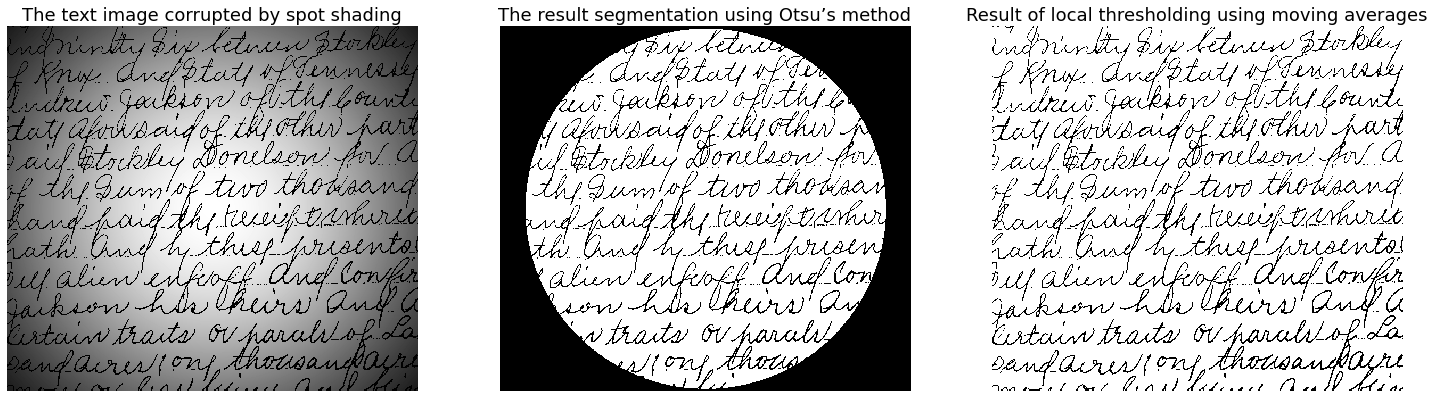

In [13]:
plt.figure(figsize=(25,14))

plt.subplot(1,3,1)
J1 = np.asarray(imageio.imread('text-spotshade.tif'))
plt.imshow(J1,cmap="gray")
plt.axis('off')
plt.title('The text image corrupted by spot shading')

plt.subplot(1,3,2)
T_otsu=filters.threshold_otsu(J1)
print("The threshold value is obrained from Ostu method:", T_otsu)
J1_otsu = np.where(J1>T_otsu, 1, 0)
plt.imshow(J1_otsu,cmap="gray")
plt.axis('off')
plt.title('The result segmentation using Otsu’s method')

plt.subplot(1,3,3)
n= 20
c= 0.5
J1 = local_thresholding(J1,n,c)
plt.imshow(J1,cmap="gray")
plt.axis('off')
plt.title('Result of local thresholding using moving averages')

The original image is a handwritten text shaded by a spot intesnity pattern. The second image is the image is obtained using the Ostu global thresholding method. The result image is not successful to overcome the intensity variation because the method generally performs poorly when the areas of interest are embedded in a nonuniform illumination field. The third image successfully segments with local thresholding using moving averages. Here, n=20 and c=0.5. This method, locally threshold image pixel by pixle to overcome spot illumination (such as a photographic flash).

The threshold value is obrained from Ostu method: 136


Text(0.5, 1.0, 'Result of local thresholding using moving averages')

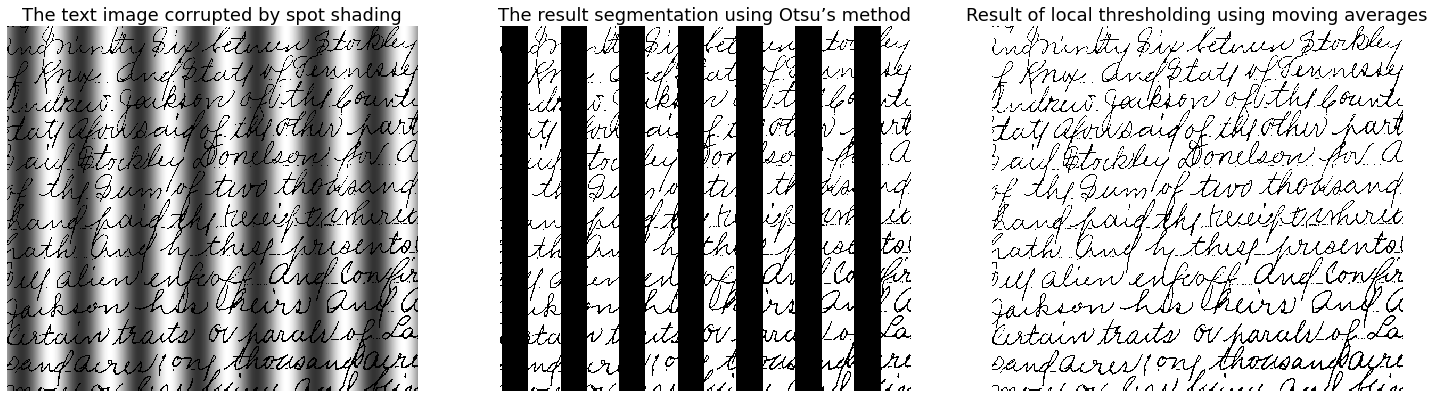

In [14]:
plt.figure(figsize=(25,14))

plt.subplot(1,3,1)
J2 = np.asarray(imageio.imread('text-sineshade.tif'))
plt.imshow(J2,cmap="gray")
plt.axis('off')
plt.title('The text image corrupted by spot shading')

plt.subplot(1,3,2)
T_otsu=filters.threshold_otsu(J2)
print("The threshold value is obrained from Ostu method:", T_otsu)
J2_otsu = np.where(J2>T_otsu, 1, 0)
plt.imshow(J2_otsu,cmap="gray")
plt.axis('off')
plt.title('The result segmentation using Otsu’s method')

plt.subplot(1,3,3)
n= 20
c= 0.5
J2 = local_thresholding(J2,n,c)
plt.imshow(J2,cmap="gray")
plt.axis('off')
plt.title('Result of local thresholding using moving averages')

The first image is corrupted by a sinusoidal intensity variation typical of the variations that may occur when the power supply in a document scanner is not properly grounded. The second image is obtained by using Ostu method. The result shows that this corruption become more clear and this method could not combat this corruption. The third image is used variable thresholding using moving average with n=20 and c=0.5. This method can successfully combat handle this distortion.